Elaborado por [Juan Galvis](https://scholar.google.com/citations?user=lbfc2joAAAAJ&hl=en).

In [ ]:
using Plots

# Bisección

Presentaremos una implementación del pseudocódigo de bisección en el texto guía.  En particular resolvemos la ecuación $\exp(x)-\sin(x)=0$.

In [ ]:
function mifun(x)
  y=exp(x)-sin(x)
  return y
end

mifun (generic function with 1 method)

Podemos hacer una gráfica para tener una idea de los parámetros del método de bisección. 

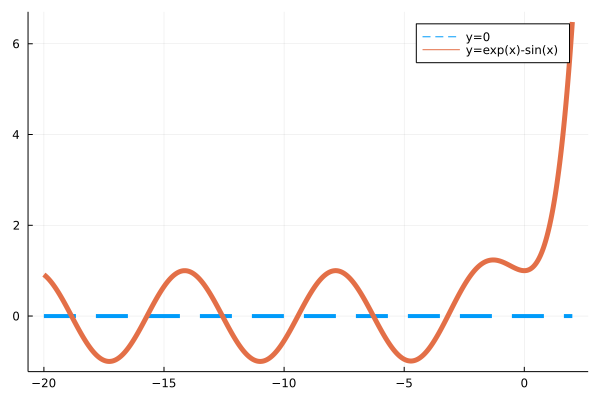

In [ ]:
a,b=-20,2
x = a:(b-a)/1000:b
y= mifun.(x)
plot(x, y*0,ls=:dash,label="y=0",lw=4)
plot!(x, y, label="y=exp(x)-sin(x)",lw=5)

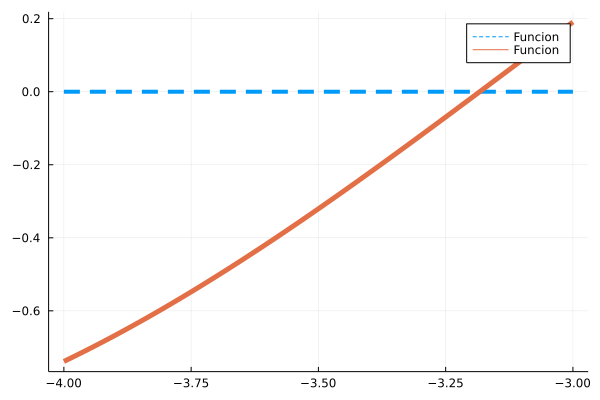

In [ ]:
a,b=-4,-3
x = a:(b-a)/1000:b
y= mifun.(x)
plot(x, y*0,ls=:dash,label="Funcion",lw=4)
plot!(x, y, label="Funcion",lw=5)

El siguiente script implementa el método de bisección para la función arriba usando como datos de entrada $[-4,-3]$, con una tolerancia a la longitud del intervalo y al valor absoluto del residuo de $10^{-8}$.

In [ ]:
a,b,M,delb,epsb=-4,-3,100,1E-10,1E-10
println("a=",a,", b=",b,", M=",M,", deltab=",delb,", epsb=",epsb)
u=mifun(a)
v=mifun(b)
e=b-a
k=1;
c=a+e
w=mifun(c)
if sign(u)!=sign(v)
    while (k <= M && abs(e)>delb && abs(w)>epsb )
        e=e/2
        println("c=",c)
        if sign(w)!=sign(u)
            b=c
            v=w
          else
            a=c
            u=w
        end
        k=k+1;
        c=a+e
        w=mifun(c)
    end 
end
    
println("k=",k,", w=f(c)=",w, ", e=",e)

a=-4, b=-3, M=100, deltab=1.0e-10, epsb=1.0e-10
c=-3
c=-3.5
c=-3.25
c=-3.125
c=-3.1875
c=-3.15625
c=-3.171875
c=-3.1796875
c=-3.18359375
c=-3.181640625
c=-3.1826171875
c=-3.18310546875
c=-3.182861328125
c=-3.1829833984375
c=-3.18304443359375
c=-3.183074951171875
c=-3.1830596923828125
c=-3.1830673217773438
c=-3.183063507080078
c=-3.1830615997314453
c=-3.1830625534057617
c=-3.18306303024292
c=-3.183062791824341
c=-3.1830629110336304
c=-3.183062970638275
c=-3.1830630004405975
c=-3.1830630153417587
c=-3.183063007891178
c=-3.1830630116164684
c=-3.1830630134791136
c=-3.183063012547791
c=-3.1830630120821297
k=33, w=f(c)=8.747742807901915e-11, e=2.3283064365386963e-10


Observamos que en la iteración 33 el programa termina con la aproximación $-3.1830630120821297$ con longitud del intervalo $|e|\approx 2.3\times 10^{-10}$ y con un residuo de $|w|\approx 8.7\times 10^{-11}$.

# Newton

In [ ]:
function minewton(f,fp,x0,myeps,mydel,max_iter)
    #=f(x)=0 usando newton xn=xa-f(xa)/fp(xa)
    ----------
    f : funnción
    fp : Derivada
    x0 : Aproximación inicial
    epsilon : Tolerancia residuo.
    M : Número maximo de iteraciones
    ----------
    =#
    x = x0
    n=1
    while n<=max_iter
        fx = f(x)
        if abs(fx) < myeps
            print("residuo f(x(",n,"))=",fx)
            return x
        end
        fpx = fp(x)
        if fpx == 0
            print("Derivada nula. Error!")
            return None
        end
        x = x - fx/fpx
        println( "x(",n,")=",x)
        if abs(x-x0) < mydel
            print("incremento delta(",n,")=",fx)
            return x
        end
        x0=x
        n=n+1
    end
    if n==max_iter
        print("Número maximo de iteraciones")
    end 
    return x0
end


minewton (generic function with 1 method)

In [ ]:
function f(x)
    return exp(x)-sin(x)
end
function fp(x)
    return exp(x)-cos(x)
end
minewton(f,fp,1.0,1e-10,1e-10,10)

x(1)=0.13827893045637507
x(2)=-6.263457215119403
x(3)=-6.281316869638125
x(4)=-6.2813143662108075
residuo f(x(5))=1.2010791666794418e-14

-6.2813143662108075

# Punto Fijo

In [ ]:
function miFpf(x)
  y=x+exp(x)-sin(x)
end

miFpf (generic function with 1 method)

In [ ]:
x0=-4
for n=1:10
  x1=miFpf(x0)
  x0=x1
  println("x=",x1)
end

x=-4.738486856419194
x=-5.729394447160081
x=-6.252060669705465
x=-6.281253801923153
x=-6.281314252785754
x=-6.281314365998385
x=-6.281314366210397
x=-6.281314366210795
x=-6.281314366210796
x=-6.281314366210796


# Paquetes

In [ ]:
using Roots

In [ ]:
f(x)=exp(x)-sin(x)

f (generic function with 1 method)

In [ ]:
x=fzero(f,-3,-4)

-3.1830630119333634

In [ ]:
using NLsolve

In [ ]:
function fv(F,x)
       F[1]=x[1]^2+x[2]^2-1
       F[2]=(x[1]-2)^2+x[2]^2-1
end

fv (generic function with 1 method)

In [ ]:
nlsolve(fv,[0.0;0.0])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [1.0, 0.0]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

# Problemas

**Problema (Kelley)** Considere el método de Shamanskii de orden $m$ definido de la siguiente manera. Dado $x_n$ calcule $x_{n+1}$ usando $m$ pasos del método de la cuerda, esto es, 

$z_1=x_n-f(x_n)/f'(x_n)$

$z_{j+1}=z_{j}-f(z_j)/f'(x_n)$, $1\leq j\leq m-1$

$x_{n+1}=z_{m}$.

Observe que se avanza m pasos sin actualiar la derivada en el punto. Implemente el método para un order $m$ definido por el usuario y verifique su código con una ecuación escalar. 

**Problema (Kelley, Iterative methodos for linear and non linear equations)** Resuelva las siguientes ecuaiones $f(x)=0$ usando el Método de newton, el método de la secante (para este inicie la iteración en $x_{-1}$ con $x_{-1}=0.99x_0$) y el método de Shamanskii con $m=2,3,4$. Comente los resultados. Puede hacer tablas o plots con las iteraciones.


1.   $f(x)=\cos(x)-x$,  $\quad x_0=.5$.
2.   $f(x)=\arctan(x)$,  $\quad x_0=1$.
3.   $f(x)=\sin(x)$, $\quad  x_0=3$.
4.   $f(x)=x^2$,  $\quad  x_0=.5$.
5.   $f(x)=x^2+1$,  $\quad  x_0=10$.



**Problema(Quarteroni, Saleri, Gervasio)** Considere un plano cuya pendiente varía con tasa constante $\omega$ y un punto de masa quieto en el tiempo $t=0$. En el tiempo $t>0$ su posición es dada por
$$s(t,\omega)= \frac{g}{2\omega^2}\Big[ \sinh(\omega t)-\sin(\omega t) \Big] $$
donde $g=9.8 \frac{m}{s^2}$. Suponga que el objeto se ha movido 1 metro en un segundo, calcule el valor correspondiente de $\omega$ con 12 decimales exactos. 

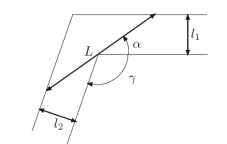

**Problema (Quarteroni, Saleri, Gervasio)** La longitud maxima de una varilla que se puede arrastrar de un extremo a otro deslizandola por un pasillo como el de la fiugra es 
$$L=\frac{l_2}{\sin(\pi-\gamma-\alpha)}+\frac{l_1}{\sin(\alpha)}$$
donde $\alpha$ es la solución de la ecuación
$$ l_2 \frac{\cos(\pi-\gamma-\alpha)}{\sin^2(\pi-\gamma-\alpha)}-l_1\frac{\cos(\alpha)}{\sin^2(\alpha)}=0.$$
Calcule $\alpha$ cuando $l_2=10$, $l_1=8$ y $\gamma=\frac{3\pi}{5}$. ¿Cuántos decimales puede garantizar para $\alpha$ y $L$?

**Problema** Seleccione alguno de los métodos implementados en julia para resolver ecuaciones o sistemas de ecuaciones. Describa el método implementado con el mayor detalle posible. 

Si usa Python selecciones dos de los métodos en https://docs.scipy.org/doc/scipy-0.13.0/reference/optimize.html en la sección Root finding, diga cual es el método numerico implementado (e.g, similar a newton, usa derivadas, no usa derivadas, combina varios métodos, llama alguna otra subrutina conocida encontrada en netlib, cuales son las toleracias por defecto, etc)  y para cada uno de los métodos seleccionados implementar un ejemplo numérico con una ecuación escalar o una ecuación vectorial según sea el caso. Imprima la solución calculada asi como alguna informacion adicional (residuo, cantidad de iteraciones, etc). 

Si usa MatLab seleccione dos de entre los métodos como fsolve, froot, fzero, roots, o similares (https://la.mathworks.com/help/optim/systems-of-nonlinear-equations.html). Análogamente para octave (https://octave.org/doc/v4.2.0/Solvers.html), julia, etc.